# Import Packages

In [1]:
import sys
import os
import numpy as np
import scanpy as sc
import pandas as pd
import anndata as ad
import episcanpy.api as epi
from matplotlib import pyplot as plt

from gff_analyser import gffClasses,gffBuilder

# modules from sctoolbox
from sctoolbox import annotation
import sctoolbox.atac as atac
import sctoolbox.calc_overlap_pct as overlap
from sctoolbox import celltype_annotation

## Set environmental variables

In [46]:
GTF_PATH = '/home/stud2/notebooks/homo_sapiens.104.mainChr.gtf'  # gtf file to use for peaks annotation
#INPUT_PATH = '/home/rstudio/data/anndata'  # path where the h5ad object is saved
WORKING_DIR = '/mnt/workspace_stud/catlas_ref/'
INPUT = WORKING_DIR + 'cellXcCRE/'
OUTPUT_PATH = '/home/rstudio/testdata'  # path where processed adata file can be save
FRAG_FILE = '/home/stud2/test/skin_sun_exposed_SM-IOBHU_rep1_fragments_sorted.bed'
#FRAG_FILE = '/mnt/workspace_stud/catlas_ref/frag/colon_sigmoid_SM-AZPYO_rep1_fragments.bed.gz'  # path to fragments file
BAM_FILE = '/mnt/workspace_stud/jdetlef/ENC-1JKYN-191-SM-JF1O8_snATAC_colon_sigmoid_Rep1.bam'  # path to bam file
H5AD = 'skin-IOBHTh5ad'
#H5AD = 'ENC-1JKYN-146-SM-A8CPH_snATAC_esophagus_muscularis_mucosa_Rep1.h5ad'  # name of the h5ad file

## Import H5AD file

In [3]:
adata = epi.read_h5ad(INPUT + H5AD)
adata

AnnData object with n_obs × n_vars = 3950 × 1154611
    obs: 'logUMI', 'tsse', 'tissue', 'cell type', 'Life stage', 'closest Cell Ontology term(s)', 'Cell Ontology ID'
    var: 'Chromosome', 'hg38_Start', 'hg38_End', 'Class', 'Present in fetal tissues', 'Present in adult tissues', 'CRE module'

## Generate GFF files

In [7]:
object_list = gffBuilder.build_gff3_class(file=GTF_PATH)

for element in object_list:
    features = element.count_features()
    element.generate_feature_gtf(Gffdata_list=object_list, feature_keys=features)

Generating gene-File
Generating transcript-File
Generating exon-File
Generating five_prime_utr-File
Generating CDS-File
Generating start_codon-File
Generating stop_codon-File
Generating three_prime_utr-File
Generating Selenocysteine-File


### Prepare Var_names

In [4]:
names = []
for name in adata.var_names:
   names.append(name)

for i, n in enumerate(names):
   tmp = names[i].replace(':', '_')
   tmp = tmp.replace('-', '_')
   tmp = tmp.split('_')
   names[i] = '_'.join([tmp[0], tmp[-2], tmp[-1]])

adata.var_names = pd.Index(names)

### Prepare obs_names

In [5]:
names = []
for name in adata.obs_names:
   names.append(name)

for i, n in enumerate(names): # colon_sigmoid_SM-JF1O8_1+
    tmp = names[i].split('+')
    names[i] = tmp[-1]

adata.obs_names = pd.Index(names, name='index')

### Calculate Overlap

In [10]:
overlap.pct_fragments_in_promoters(adata, input_dir='out/', fragments_file=FRAG_FILE, bam_file=None, cb_col=None, species=None)

Converting GTF to BED...
Finding overlaps...
Calculating percentage...
Adding results to adata object...
Done
Finding overlaps...
There was no overlap!
Finding overlaps...


Error: Unable to open file out/homo_sapiens.104.mainChr.exon.gtf_sorted_sorted.bed. Exiting.
Error: Unable to open file out/homo_sapiens.104.mainChr.five_prime_utr.gtf_sorted_sorted.bed. Exiting.


There was no overlap!
Converting GTF to BED...
Finding overlaps...
Calculating percentage...
Adding results to adata object...
Done
Converting GTF to BED...
Finding overlaps...
Calculating percentage...
Adding results to adata object...
Done
Converting GTF to BED...
Finding overlaps...
Calculating percentage...
Adding results to adata object...
Done
Converting GTF to BED...
Finding overlaps...
Calculating percentage...
Adding results to adata object...
Done
Finding overlaps...
There was no overlap!
Converting GTF to BED...


Error: Unable to open file out/homo_sapiens.104.mainChr.CDS.gtf_sorted_sorted.bed. Exiting.


Finding overlaps...
Calculating percentage...
Adding results to adata object...
Done
Converting GTF to BED...
Finding overlaps...
Calculating percentage...
Adding results to adata object...
Done
Finding overlaps...
There was no overlap!
Converting GTF to BED...


Error: Unable to open file out/homo_sapiens.104.mainChr.transcript_tmp_sorted.bed. Exiting.


Finding overlaps...
Calculating percentage...
Adding results to adata object...
Done
Finding overlaps...
There was no overlap!
Finding overlaps...


Error: Unable to open file out/homo_sapiens.104.mainChr.three_prime_utr.gtf_sorted_sorted.bed. Exiting.
Error: Unable to open file out/homo_sapiens.104.mainChr.stop_codon.gtf_sorted_sorted.bed. Exiting.


There was no overlap!
Converting GTF to BED...
Finding overlaps...
Calculating percentage...
Adding results to adata object...
Done


In [59]:
adata = epi.read_h5ad("/mnt/workspace_stud/stud3/skin-IOBHT_daniel2.h5ad")

## Export created H5AD file

In [12]:
import hdf5plugin
adata.write_h5ad(
    "out/skin_sunexposed_mapped.h5ad",
    compression=hdf5plugin.FILTERS["zstd"]
)

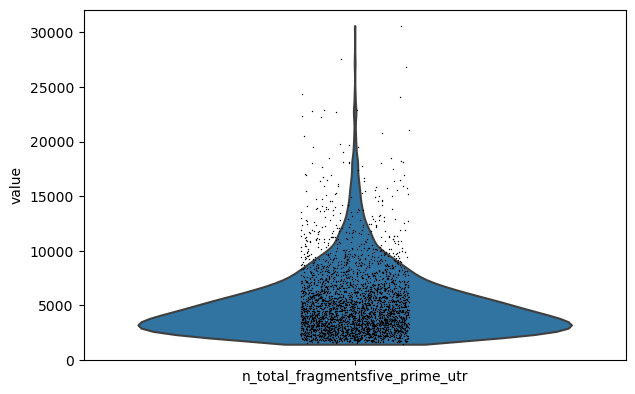

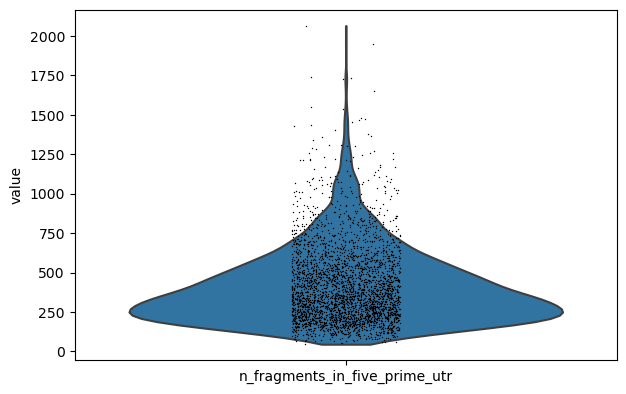

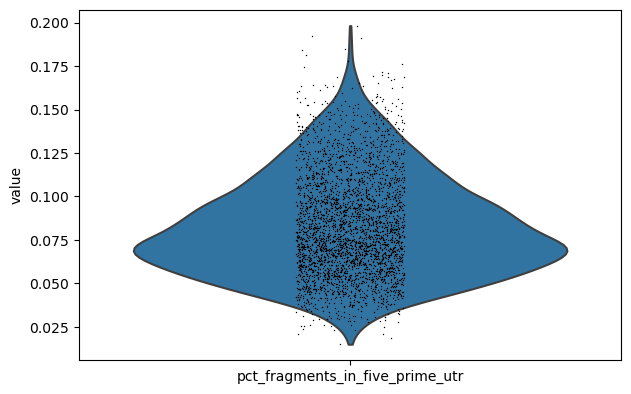

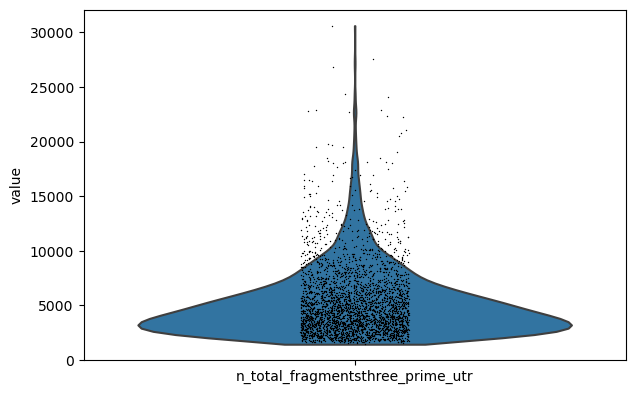

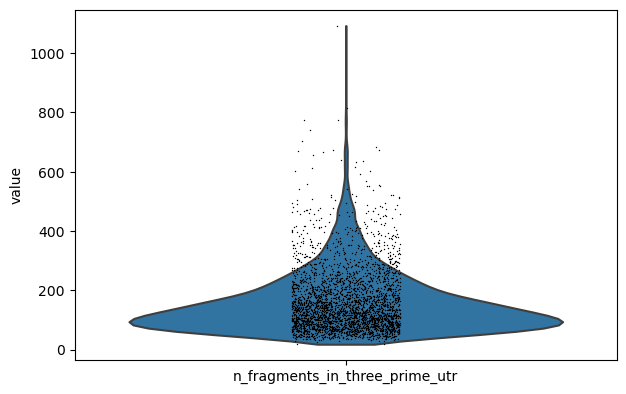

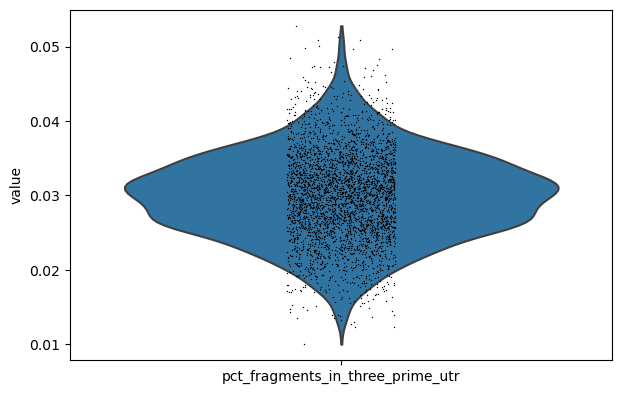

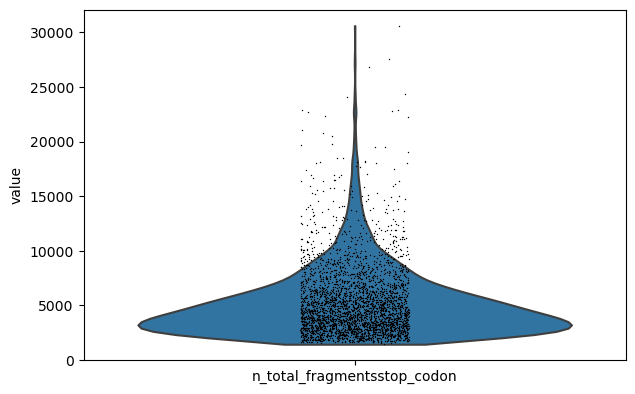

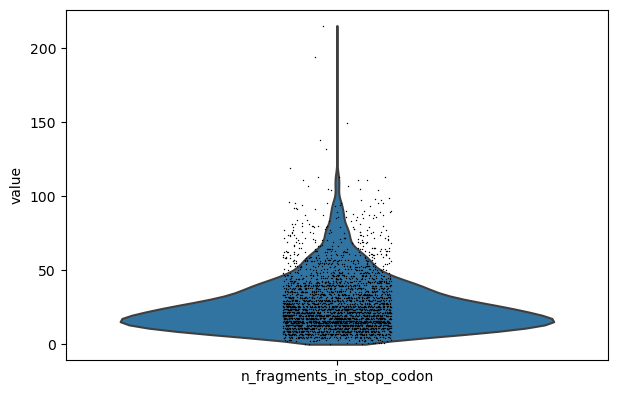

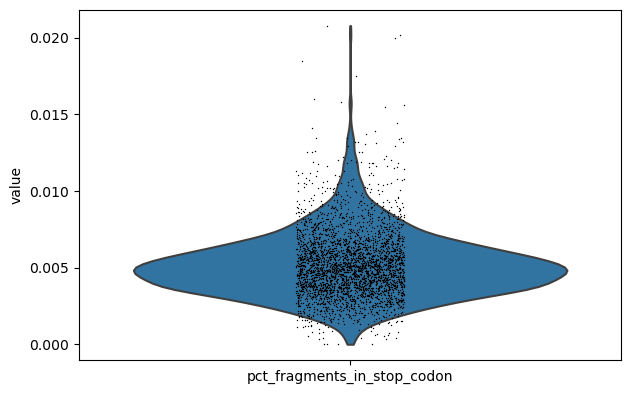

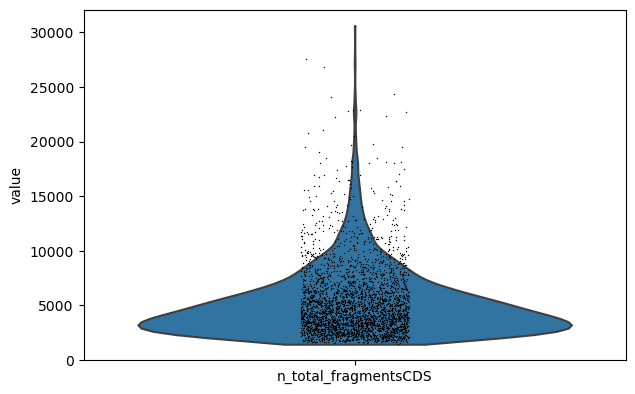

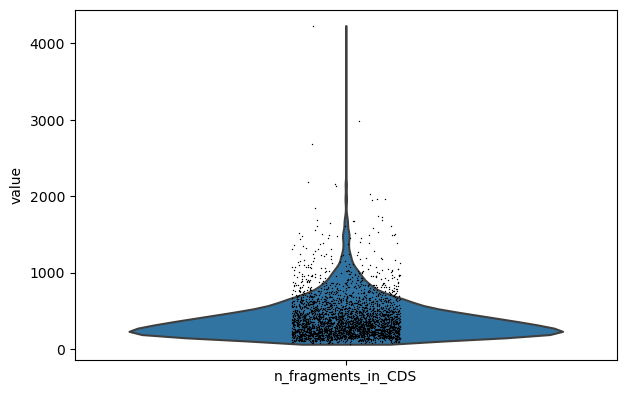

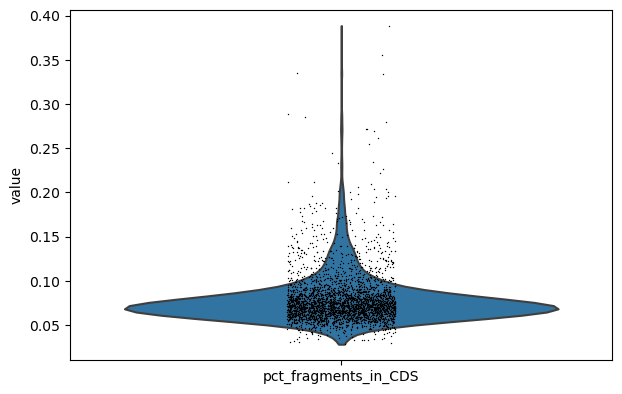

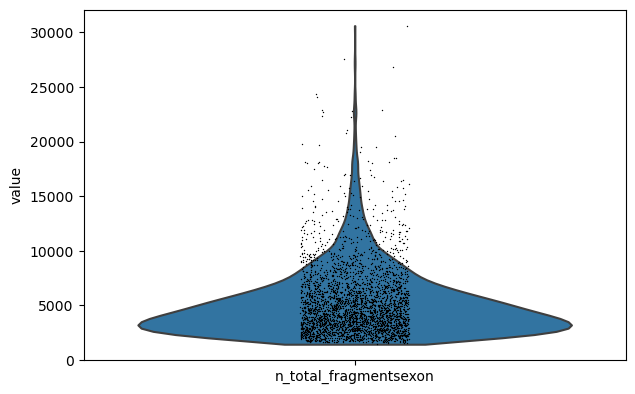

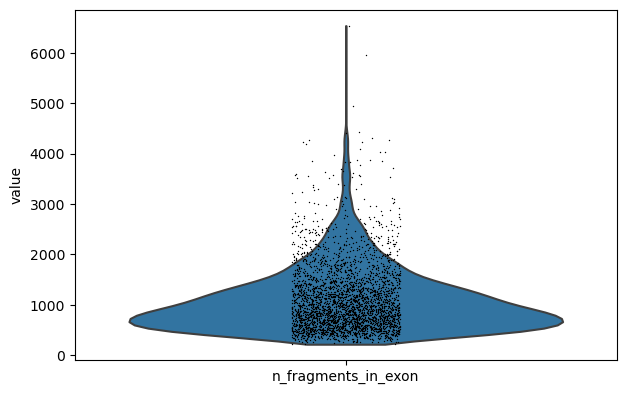

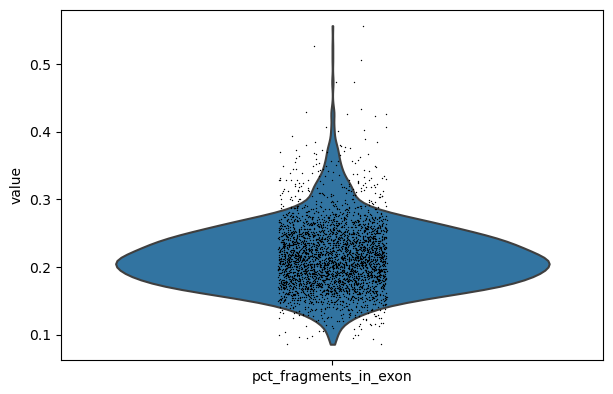

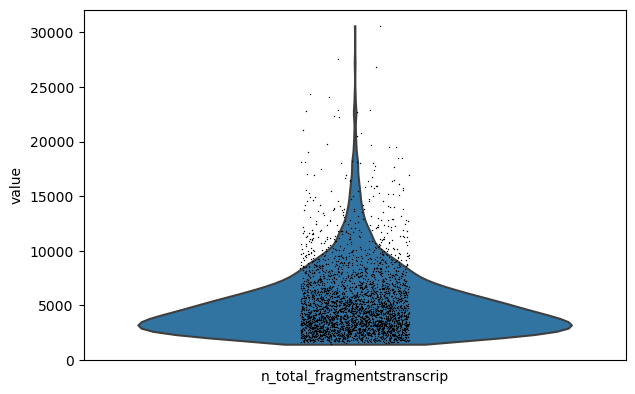

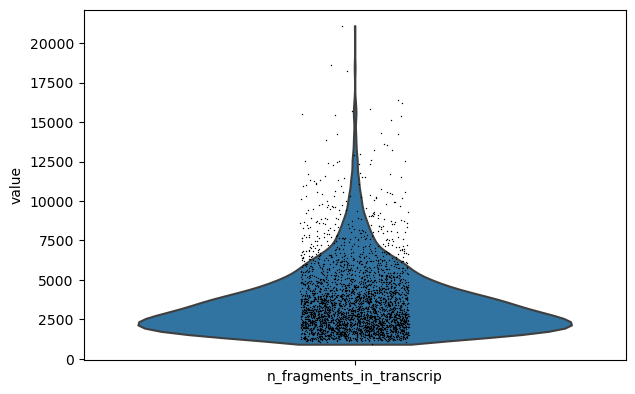

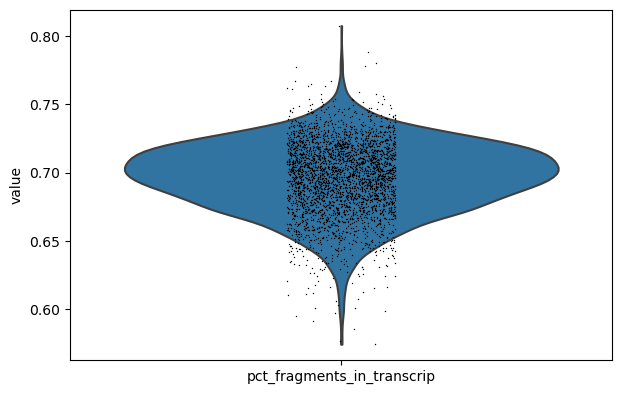

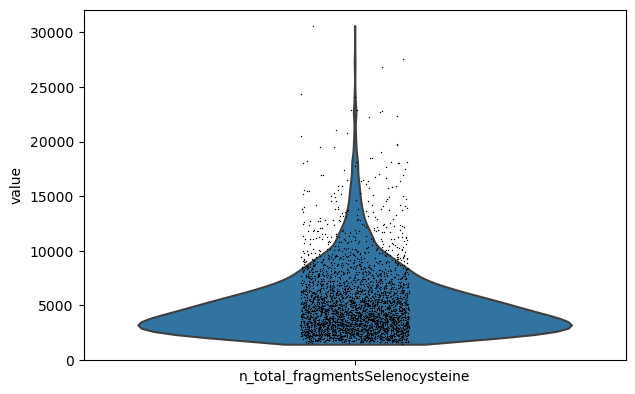

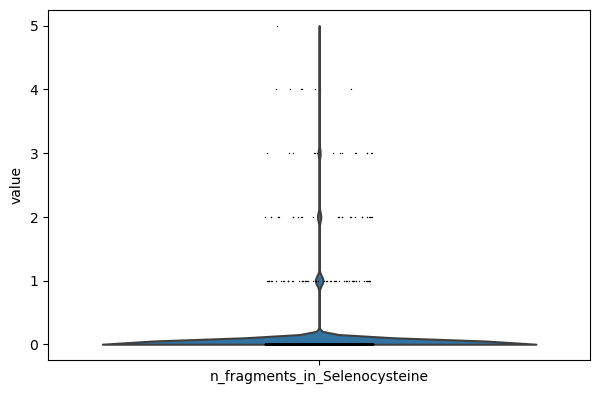

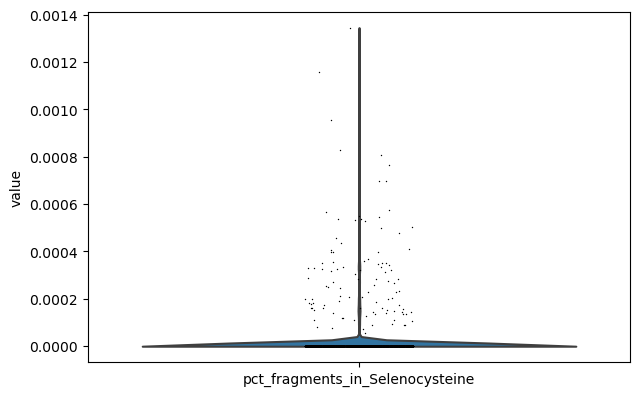

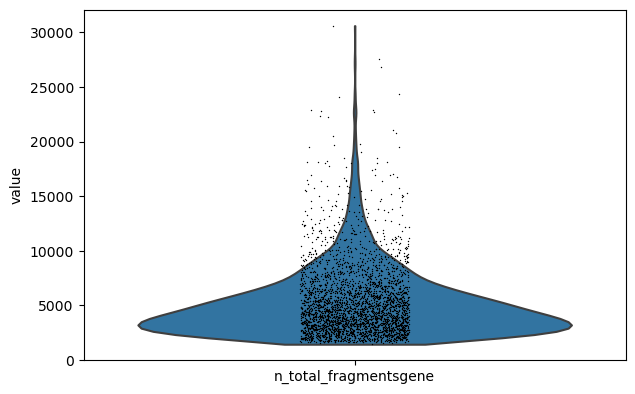

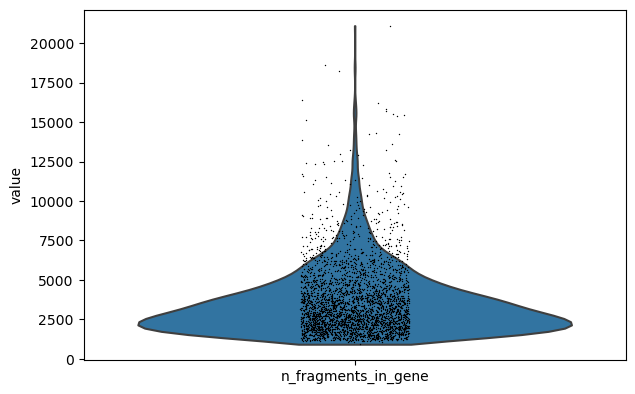

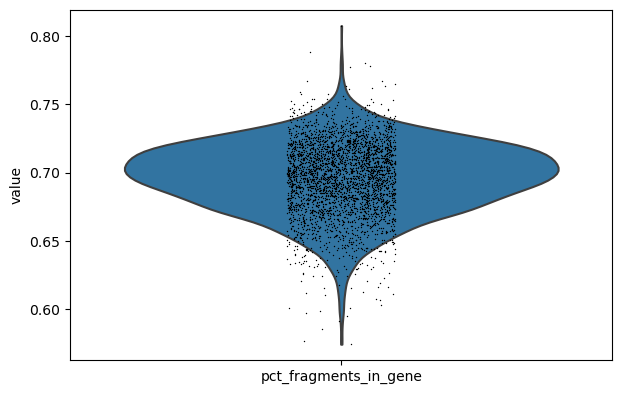

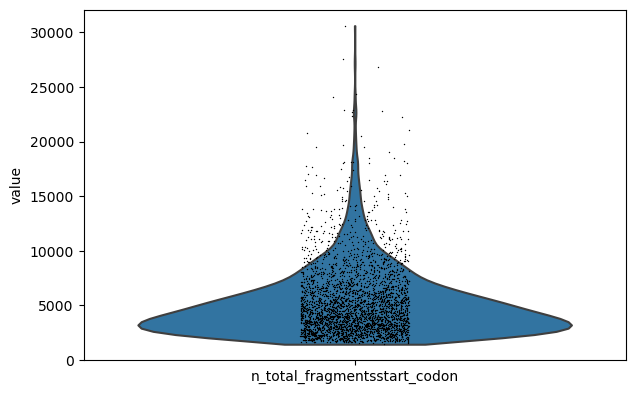

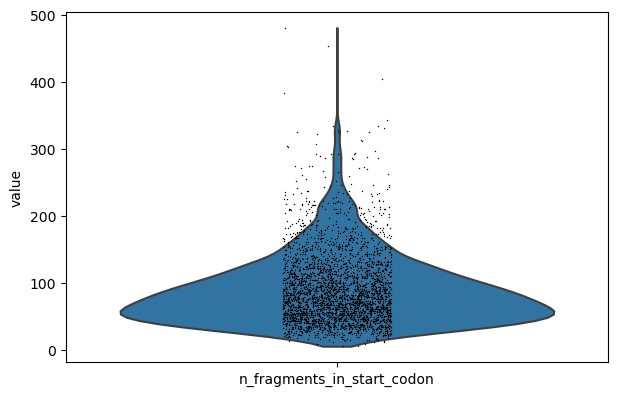

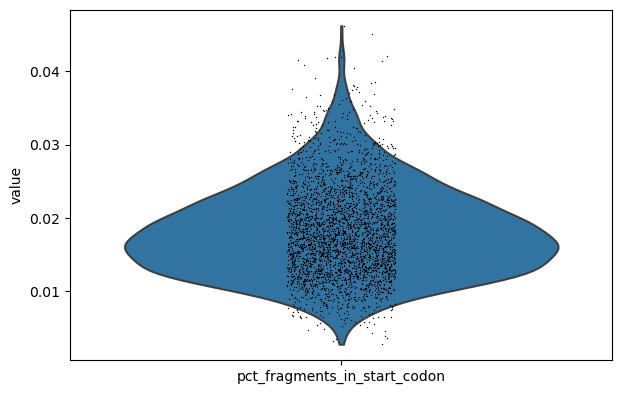

In [60]:
epi.pl.violin(adata, [ 'n_total_fragmentsfive_prime_utr' ], save="_n_total_fragments_five_prime_utr_" + H5AD + ".png")
epi.pl.violin(adata, [ 'n_fragments_in_five_prime_utr' ], save="_n_fragments_in_five_prime_utr_" + H5AD + ".png")
epi.pl.violin(adata, [ 'pct_fragments_in_five_prime_utr' ], save="_pct_fragments_five_prime_utr_" + H5AD + ".png")
epi.pl.violin(adata, [ 'n_total_fragmentsthree_prime_utr' ], save="_n_total_fragments_in_three_prime_utr_" + H5AD + ".png")
epi.pl.violin(adata, [ 'n_fragments_in_three_prime_utr'], save="_n_fragments_in_three_prime_utr_" + H5AD + ".png")
epi.pl.violin(adata, [ 'pct_fragments_in_three_prime_utr'], save="_pct_fragments_in_three_prime_utr_" + H5AD + ".png")
epi.pl.violin(adata, [ 'n_total_fragmentsstop_codon'], save="_n_total_fragments_in_stop_codon_" + H5AD + ".png")
epi.pl.violin(adata, [ 'n_fragments_in_stop_codon'], save="_n_fragments_in_stop_codon_" + H5AD + ".png")
epi.pl.violin(adata, [ 'pct_fragments_in_stop_codon'], save="_pct_fragments_in_stop_codon_" + H5AD + ".png")
epi.pl.violin(adata, [ 'n_total_fragmentsCDS'], save="_n_total_fragments_in_CDS_" + H5AD + ".png")
epi.pl.violin(adata, [ 'n_fragments_in_CDS'], save="_n_fragments_in_CDS_" + H5AD + ".png")
epi.pl.violin(adata, [ 'pct_fragments_in_CDS'], save="_pct_fragments_in_CDS_" + H5AD + ".png")
epi.pl.violin(adata, [ 'n_total_fragmentsexon'], save="_n_total_fragments_in_exon_" + H5AD + ".png")
epi.pl.violin(adata, [ 'n_fragments_in_exon'], save="_n_fragments_in_exon_" + H5AD + ".png")
epi.pl.violin(adata, [ 'pct_fragments_in_exon'], save="_pct_fragments_in_exon_" + H5AD + ".png")
epi.pl.violin(adata, [ 'n_total_fragmentstranscrip'], save="_n_total_fragments_in_transcrip_" + H5AD + ".png")
epi.pl.violin(adata, [ 'n_fragments_in_transcrip'], save="_n_fragments_in_transcrip_" + H5AD + ".png")
epi.pl.violin(adata, [ 'pct_fragments_in_transcrip'], save="_pct_fragments_in_transcrip_" + H5AD + ".png")
epi.pl.violin(adata, [ 'n_total_fragmentsSelenocysteine'], save="_n_total_fragments_in_selenocysteine_" + H5AD + ".png")
epi.pl.violin(adata, [ 'n_fragments_in_Selenocysteine'], save="_n_fragments_in_selenocysteine_" + H5AD + ".png")
epi.pl.violin(adata, [ 'pct_fragments_in_Selenocysteine'], save="_pct_fragments_in_selenocysteine_" + H5AD + ".png")
epi.pl.violin(adata, [ 'n_total_fragmentsgene'], save="_n_total_fragments_in_gene_" + H5AD + ".png")
epi.pl.violin(adata, [ 'n_fragments_in_gene'], save="_n_fragments_in_gene_" + H5AD + ".png")
epi.pl.violin(adata, [ 'pct_fragments_in_gene'], save="_pct_fragments_in_gene_" + H5AD + ".png")
epi.pl.violin(adata, [ 'n_total_fragmentsstart_codon'], save="_n_total_fragments_in_start_codon_" + H5AD + ".png")
epi.pl.violin(adata, [ 'n_fragments_in_start_codon'], save="_n_fragments_in_start_codon_" + H5AD + ".png")
epi.pl.violin(adata, [ 'pct_fragments_in_start_codon'], save="_pct_fragments_in_start_codon_" + H5AD + ".png")

## Clean Cells

### Remove Chromosome M

In [61]:
non_m = [name for name in adata.var_names if not name.startswith('chrM')]
adata = adata[:, non_m]
display(adata)

View of AnnData object with n_obs × n_vars = 3314 × 1154611
    obs: 'logUMI', 'tsse', 'tissue', 'cell type', 'Life stage', 'closest Cell Ontology term(s)', 'Cell Ontology ID', 'n_total_fragmentsthree_prime_utr', 'n_fragments_in_three_prime_utr', 'pct_fragments_in_three_prime_utr', 'n_total_fragmentsstop_codon', 'n_fragments_in_stop_codon', 'pct_fragments_in_stop_codon', 'n_total_fragmentsgene', 'n_fragments_in_gene', 'pct_fragments_in_gene', 'n_total_fragmentsCDS', 'n_fragments_in_CDS', 'pct_fragments_in_CDS', 'n_total_fragmentsexon', 'n_fragments_in_exon', 'pct_fragments_in_exon', 'n_total_fragmentsstart_codon', 'n_fragments_in_start_codon', 'pct_fragments_in_start_codon', 'n_total_fragmentstranscrip', 'n_fragments_in_transcrip', 'pct_fragments_in_transcrip', 'n_total_fragmentsSelenocysteine', 'n_fragments_in_Selenocysteine', 'pct_fragments_in_Selenocysteine', 'n_total_fragmentsfive_prime_utr', 'n_fragments_in_five_prime_utr', 'pct_fragments_in_five_prime_utr'
    var: 'Chromosome', 

### Optional: Remove X and Y chromosomes

In [62]:
non_xy = [name for name in adata.var_names if not name.startswith('chrY') | name.startswith('chrX')]
adata = adata[:, non_xy]
display(adata)

View of AnnData object with n_obs × n_vars = 3314 × 1121466
    obs: 'logUMI', 'tsse', 'tissue', 'cell type', 'Life stage', 'closest Cell Ontology term(s)', 'Cell Ontology ID', 'n_total_fragmentsthree_prime_utr', 'n_fragments_in_three_prime_utr', 'pct_fragments_in_three_prime_utr', 'n_total_fragmentsstop_codon', 'n_fragments_in_stop_codon', 'pct_fragments_in_stop_codon', 'n_total_fragmentsgene', 'n_fragments_in_gene', 'pct_fragments_in_gene', 'n_total_fragmentsCDS', 'n_fragments_in_CDS', 'pct_fragments_in_CDS', 'n_total_fragmentsexon', 'n_fragments_in_exon', 'pct_fragments_in_exon', 'n_total_fragmentsstart_codon', 'n_fragments_in_start_codon', 'pct_fragments_in_start_codon', 'n_total_fragmentstranscrip', 'n_fragments_in_transcrip', 'pct_fragments_in_transcrip', 'n_total_fragmentsSelenocysteine', 'n_fragments_in_Selenocysteine', 'pct_fragments_in_Selenocysteine', 'n_total_fragmentsfive_prime_utr', 'n_fragments_in_five_prime_utr', 'pct_fragments_in_five_prime_utr'
    var: 'Chromosome', 

### Remove empty features

In [63]:
# remove cells with empty features
epi.pp.filter_cells(adata, min_features=1)
# remove features with no cells
epi.pp.filter_features(adata, min_cells=1)

# calculate the log of the number of features in each cell
adata.obs['log_nb_features'] = [np.log10(x) for x in adata.obs['nb_features']]
adata

AnnData object with n_obs × n_vars = 3314 × 917088
    obs: 'logUMI', 'tsse', 'tissue', 'cell type', 'Life stage', 'closest Cell Ontology term(s)', 'Cell Ontology ID', 'n_total_fragmentsthree_prime_utr', 'n_fragments_in_three_prime_utr', 'pct_fragments_in_three_prime_utr', 'n_total_fragmentsstop_codon', 'n_fragments_in_stop_codon', 'pct_fragments_in_stop_codon', 'n_total_fragmentsgene', 'n_fragments_in_gene', 'pct_fragments_in_gene', 'n_total_fragmentsCDS', 'n_fragments_in_CDS', 'pct_fragments_in_CDS', 'n_total_fragmentsexon', 'n_fragments_in_exon', 'pct_fragments_in_exon', 'n_total_fragmentsstart_codon', 'n_fragments_in_start_codon', 'pct_fragments_in_start_codon', 'n_total_fragmentstranscrip', 'n_fragments_in_transcrip', 'pct_fragments_in_transcrip', 'n_total_fragmentsSelenocysteine', 'n_fragments_in_Selenocysteine', 'pct_fragments_in_Selenocysteine', 'n_total_fragmentsfive_prime_utr', 'n_fragments_in_five_prime_utr', 'pct_fragments_in_five_prime_utr', 'nb_features', 'log_nb_features

#### Binarize and save different layers

In [64]:
epi.pp.binarize(adata)
adata.layers['binary'] = adata.X.copy()

#### Filter by min and max filter

In [65]:
# filter cells which have at least min_features and at most max_features
epi.pp.filter_cells(adata, min_features=150)
epi.pp.filter_cells(adata, max_features=10000)

#### Normalize Data

In [66]:
sc.pp.normalize_total(adata)
adata.layers['normalised'] = adata.X.copy()

# log-normalize
epi.pp.log1p(adata)

#### Calculate PCA and Neighbours

In [67]:
# calculate pca
sc.pp.pca(adata, n_comps=50, svd_solver='arpack', use_highly_variable=False)
# calculate neighbors
sc.pp.neighbors(adata, n_neighbors=15, n_pcs=50, method='umap', metric='euclidean')

In [ ]:
sc.tl.umap(adata, min_dist=0.5, spread=2.0)

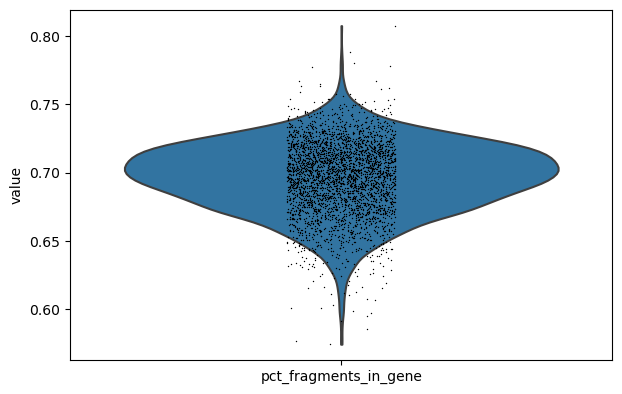

KeyError: "Could not find keys '['n_fragements_in_gene']' in columns of `adata.obs` or in adata.var_names."

In [76]:
epi.pl.violin(adata, [ 'pct_fragments_in_gene' ])
epi.pl.violin(adata, [ 'n_fragements_in_gene' ])


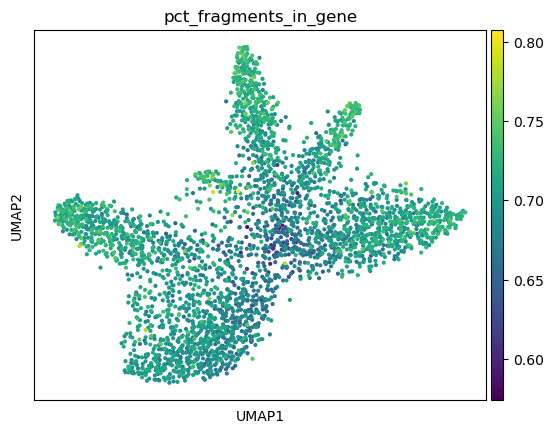

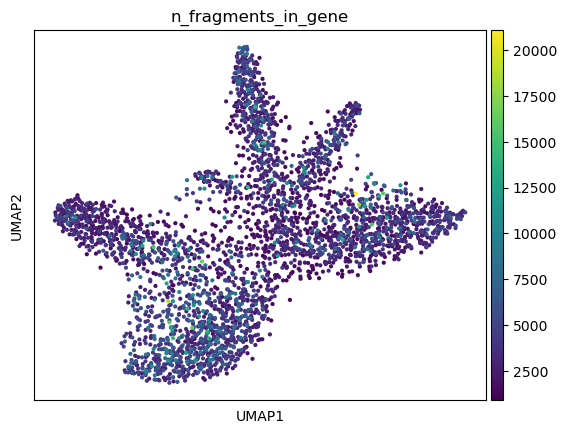

In [75]:
# Visualize cells in UMAP
sc.pl.umap(adata, color = 'pct_fragments_in_gene', legend_loc = 'right margin')
sc.pl.umap(adata, color = 'n_fragments_in_gene', legend_loc = 'right margin')